# Analiza podatkov
V sledečem zvezku se nahaja analiza podatkov iz spletne strani [Musescore](https://musescore.com/sheetmusic).

V _prvem delu_ bom izvedla preprosto analizo pridobljenih podatkov. 
Zanimalo me bo, kako se posamezni parametri povezujejo s popularnostjo skladbe ter povezave med parametri.
Konkretno želim odgovoriti na naslednja vprašanja:
* Katerih skladb je največ nasploh in za specifične kategorije?
* Katere so najpopularnejše?
* Kakšna je povezava med popularnostjo in številčnostjo skladb glede na kategorije?
* Kakšne so lasnosti skladb, ki spadajo v Klasično glasbo, v primerjavi z ostalimi?


V _drugem delu_ se bom lotila nekoliko zahtevnejše analize.
Zanimalo me bo, če obstaja recept za uspešno objavo - pri tem bom uporabila pridobljene informacije iz prvega dela; hkrati pa bom izdelala napovedovalec popularnosti skladbe glede na parametre, kot je žanr, inštrument in podobno.

Zanimala pa me bo tudi časovna slika podatkov. Tako bom podatke razdelila na smiselne časovne intervale in znotraj teh poiskala parametre, kot je povprečna zvrst, dolžina itn. objavljenih skladb v tem obdobju; prav tako pa bom po zastopanosti v tem obdobju uredila originale. Iskala bom obdobja večjih sprememb v podatkih in poskusila najti odgovor, zakaj je do njih prišlo. Zanimala me bo dominantnost posameznih žanrov in inštrumentov, z analizo žanrov pa bom tudi ustvarila sliko glasbenih okusov skozi čas.  
Glede na rezultate bom ustvarila tudi predpostavke za spremembe trendov v prihodnosti.  
Dobljene rezultate bom tudi vizualno predstavila s smiselnimi grafi.
Ugotovitve o časovnih trendih bom dodala svojemu napovedovalcu popularnosti.

## Uvoz podatkov

In [40]:
# Naložimo potrebne knjižnjice
import pandas as pd
import os.path 
import ast
import seaborn

# Nastavimo pravilen prikaz grafov
%matplotlib inline

# Nastavimo izpisovanje po 6 vrstic, saj delamo z ogromno količino podatkov, in bi bile razpredelnice sicer prevelike.
pd.options.display.max_rows = 6

In [41]:
# naložimo osnovno razpredelnico, s katero bomo delali
music = pd.read_csv(os.path.join('obdelani-podatki','all_music.csv'), index_col="music_id")
music

,title,rating,votes,ensemble,instrument,key,date,duration,public_domain,favorites,difficulty,pages,views,parts,link
music_id,,,,,,,,,,,,,,,
4197961,Merry-Go-Round of Life: Howl's Moving Castle P...,4.77,47676,Solo Piano,['Piano'],"['B♭ major', 'G minor']","Jul 05, 2017",05:15,NE,181934,Intermediate,7,4589622,1,https://musescore.com/user/16006641/scores/419...
3291706,River Flows In You,4.68,45503,Solo Piano,['Piano'],"['A major', 'F♯ minor']","Jan 24, 2017",02:47,NE,207886,Intermediate,4,5975850,1,https://musescore.com/user/12461571/scores/329...
1019991,Canon in D,4.71,33989,Solo Piano,['Piano'],"['D major', 'B minor']","Jul 01, 2015",04:05,DA,137361,Intermediate,6,3275886,1,https://musescore.com/user/1809056/scores/1019991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766136,Boogie Woogie and Blues Licks,4.62,323,Solo Piano,['Piano'],"['C major', 'A minor']","Oct 21, 2017",01:07,DA,1633,Intermediate,2,25978,1,https://musescore.com/user/39215063/scores/476...
4926407,Cruel Angel's Thesis - Piano Cover by Theishter,4.86,323,Solo Piano,['Piano'],"['E♭ major', 'C minor']","Feb 07, 2018",01:33,NE,1732,Advanced,3,49784,1,https://musescore.com/user/27635868/scores/492...
5087038,Vincent Starry Starry Night,4.67,323,Solo Piano,['Piano'],"['G major', 'E minor']","May 08, 2018",04:08,NE,1200,Intermediate,4,53453,1,https://musescore.com/user/28424340/scores/508...


Tabelo želimo nekoliko popraviti. Tonalitete bi radi v obliki enega samega niza; pri tem upoštevamo, da je vedno podan par komplementnih tonalitet.

In [42]:
# Podatki v tabeli le izgledajo kot seznami, vendar so v resnici tipa string. To popravimo z uporabo knjižnjice ast
music["key"] = music["key"].apply(ast.literal_eval)

# Funkcija, ki združuje dva elementa seznama
def concatenate_key(key_list):
    return ', '.join(key_list)

# To funkcijo uporabimo na naši tabeli
music['key'] = music['key'].apply(concatenate_key)

music

,title,rating,votes,ensemble,instrument,key,date,duration,public_domain,favorites,difficulty,pages,views,parts,link
music_id,,,,,,,,,,,,,,,
4197961,Merry-Go-Round of Life: Howl's Moving Castle P...,4.77,47676,Solo Piano,['Piano'],"B♭ major, G minor","Jul 05, 2017",05:15,NE,181934,Intermediate,7,4589622,1,https://musescore.com/user/16006641/scores/419...
3291706,River Flows In You,4.68,45503,Solo Piano,['Piano'],"A major, F♯ minor","Jan 24, 2017",02:47,NE,207886,Intermediate,4,5975850,1,https://musescore.com/user/12461571/scores/329...
1019991,Canon in D,4.71,33989,Solo Piano,['Piano'],"D major, B minor","Jul 01, 2015",04:05,DA,137361,Intermediate,6,3275886,1,https://musescore.com/user/1809056/scores/1019991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766136,Boogie Woogie and Blues Licks,4.62,323,Solo Piano,['Piano'],"C major, A minor","Oct 21, 2017",01:07,DA,1633,Intermediate,2,25978,1,https://musescore.com/user/39215063/scores/476...
4926407,Cruel Angel's Thesis - Piano Cover by Theishter,4.86,323,Solo Piano,['Piano'],"E♭ major, C minor","Feb 07, 2018",01:33,NE,1732,Advanced,3,49784,1,https://musescore.com/user/27635868/scores/492...
5087038,Vincent Starry Starry Night,4.67,323,Solo Piano,['Piano'],"G major, E minor","May 08, 2018",04:08,NE,1200,Intermediate,4,53453,1,https://musescore.com/user/28424340/scores/508...


Popraviti želimo tudi stolpec "duration". Podatki v njem so tipa string, nam pa bo primernejši za uporabo tip int, s katerim bomo lažje pretvarjali dane podatke v timedelta format.

In [43]:
# Pretvorba v sekunde, ki ulovi primere, ko nimamo podatkov
def convert_to_seconds(duration):
    if pd.isna(duration) or not isinstance(duration, str):
        return None
    parts = duration.split(':')
    if len(parts) == 2:
        try:
            minutes, seconds = map(int, parts)
            return minutes * 60 + seconds
        except ValueError:
            return None
    return None

music['duration_seconds'] = music['duration'].apply(convert_to_seconds)
music

,title,rating,votes,ensemble,instrument,key,date,duration,public_domain,favorites,difficulty,pages,views,parts,link,duration_seconds
music_id,,,,,,,,,,,,,,,,
4197961,Merry-Go-Round of Life: Howl's Moving Castle P...,4.77,47676,Solo Piano,['Piano'],"B♭ major, G minor","Jul 05, 2017",05:15,NE,181934,Intermediate,7,4589622,1,https://musescore.com/user/16006641/scores/419...,315.0
3291706,River Flows In You,4.68,45503,Solo Piano,['Piano'],"A major, F♯ minor","Jan 24, 2017",02:47,NE,207886,Intermediate,4,5975850,1,https://musescore.com/user/12461571/scores/329...,167.0
1019991,Canon in D,4.71,33989,Solo Piano,['Piano'],"D major, B minor","Jul 01, 2015",04:05,DA,137361,Intermediate,6,3275886,1,https://musescore.com/user/1809056/scores/1019991,245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766136,Boogie Woogie and Blues Licks,4.62,323,Solo Piano,['Piano'],"C major, A minor","Oct 21, 2017",01:07,DA,1633,Intermediate,2,25978,1,https://musescore.com/user/39215063/scores/476...,67.0
4926407,Cruel Angel's Thesis - Piano Cover by Theishter,4.86,323,Solo Piano,['Piano'],"E♭ major, C minor","Feb 07, 2018",01:33,NE,1732,Advanced,3,49784,1,https://musescore.com/user/27635868/scores/492...,93.0
5087038,Vincent Starry Starry Night,4.67,323,Solo Piano,['Piano'],"G major, E minor","May 08, 2018",04:08,NE,1200,Intermediate,4,53453,1,https://musescore.com/user/28424340/scores/508...,248.0


In [44]:
music.rename(columns={"instrument":"all_instruments"}, inplace=True)

Naložimo tudi pomožne razpredelnice, v katerih imamo dodatne podatke o avtorjih, uporabnikih, itd.

In [45]:
authors = pd.read_csv(os.path.join('obdelani-podatki','authors.csv'), index_col="author_id")
genres = pd.read_csv(os.path.join('obdelani-podatki','genres.csv'))
users = pd.read_csv(os.path.join('obdelani-podatki','users.csv'), index_col="user_id")
relacije_authors = pd.read_csv(os.path.join('obdelani-podatki','relacije_authors.csv'))
relacije_users = pd.read_csv(os.path.join('obdelani-podatki','relacije_users.csv'))

Pomagale nam bodo še naslednje tabele.

* tabela z urejenimi originali in informacijo o številu ponovitev

In [46]:
# Tabela s surovimi podatki
originals = relacije_authors.copy()

# Razvrstimo po skupinah glede na originalne avtorje in originalne naslove ter jih obdelamo
originals = originals.groupby(['original_author', 'original_title'])['music_id'].agg(list).reset_index()

# Dolžina seznama pri vsakem originalu nam pove, koliko vnosov mu pripada
originals['repetitions'] = originals['music_id'].apply(len)
originals


,original_author,original_title,music_id,repetitions
0,0,H0me Sw33t H0me,[5467064],1
1,7,Orange,[2497626],1
2,24,Mood,[6350578],1
...,...,...,...,...
1182,411822,Wednesday Play The Cello,[9144624],1
1183,447430,Cupid,[10367578],1
1184,452182,CMP,[6305471],1


* tabela s podatki o inštrumentih, ki niso več v obliki seznamov

In [47]:
# Podatki v tabeli le izgledajo kot seznami, vendar so v resnici tipa string. To popravimo z uporabo knjižnjice ast
music["all_instruments"] = music["all_instruments"].apply(ast.literal_eval)

# Izberemo le podatke o inštrumentih
instruments_lists = music[["all_instruments"]].copy().reset_index()

# Metoda explode pomaga pri razbitju listov na posamezne člene
instruments = instruments_lists.explode("all_instruments", ignore_index=True)

instruments.rename(columns={'all_instruments': 'instrument'}, inplace=True)

instruments

,music_id,instrument
0,4197961,Piano
1,3291706,Piano
2,1019991,Piano
...,...,...
1996,4766136,Piano
1997,4926407,Piano
1998,5087038,Piano


Nove tabele si shranimo.

In [48]:
instruments.to_csv(os.path.join('obdelani-podatki','instruments.csv'), index=False, encoding='utf-8')
originals.to_csv(os.path.join('obdelani-podatki','originals.csv'), index=False, encoding='utf-8')

## _Prvi del_: Osnovna analiza

Prvi del razdelimo na več vsebinskih sklopov. 
* **Količinska analiza**: Odgovorimo na vprašanje, kakšnih skladb je največ.
* **Popularnost**: Vzpostavimo merilo popularnosti in ga izračunamo. Ugotovimo, kakšne skladbe so najbolj popularne.
* **Klasična glasba**: Posebna obravnava klasične glasbe.
* **Zaključek**: Preverjanje veljavnosti hipotez in povzetek ugotovitev.

### Količinska analiza

Začnimo našo analizo z obravnavo številčnosti vnosov v kontekstu posameznih kategorij. Specifično bom po številu vnosov uredila žanre, inštrumente, težavnostne nivoje, zasedbe, tonalitete, in originalne avtorje. Za lažjo predtavo jih bom vizualizirala s primernimi grafi.
Pri uporabnikih bom uporabila nekoliko drugačen pristop, ki bo natančneje opisan v podpoglavju Uporabniki.

#### Glasbene zvrsti

In [49]:
# Združimo tabeli music in genre glede na music_id
zanri_povezano = music.merge(genres, on="music_id")

# Za vsak žanr preštejemo pripadajoče vnose ter jih ustrezno razvrstimo
genre_frequency = zanri_povezano.groupby("genre").size().sort_values(ascending=False)

# Popravimo indekse
genre_frequency = genre_frequency.reset_index(name='frequency')

genre_frequency

,genre,frequency
0,Classical,748
1,Soundtrack,457
2,Pop,380
...,...,...
15,Disco,5
16,Comedy,4
17,Experimental,3


Te podatke si želimo prikazati v obliki krožnega diagrama. Vizualno so zanimivi tisti, ki jih je največ, zato prikažemo le take in ostale združimo v kategorijo Other.

<Axes: >

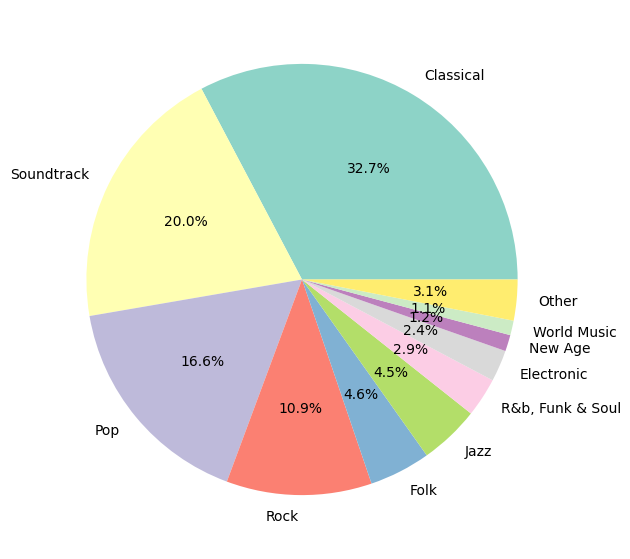

In [50]:
# Poiščemo najštevilčnejše
top_genres = genre_frequency.head(10)

# Preštejemo skupno število vseh ostalih
other_genres = genre_frequency["frequency"][10:].sum()

# Najštevilčnejšim žanrom dodamo podatek o ostalih
pie_data = pd.concat([top_genres, pd.DataFrame({'genre': ['Other'], 'frequency': [other_genres]})])

# Za namene grafa bomo kot indeks uporabili genre
pie_data = pie_data.set_index("genre")

# Podatki za grafični prikaz
pie_data.plot.pie(y="frequency", figsize=(7, 7), legend=False, autopct='%1.1f%%', ylabel="", colormap='Set3')

#### Glasbila

In [51]:
# Za vsak inštrument preštejemo pripadajoče vnose ter jih ustrezno razvrstimo
instrument_frequency = instruments.groupby("instrument").size().sort_values(ascending=False)

# Popravimo indekse
instrument_frequency = instrument_frequency.reset_index(name='frequency')

instrument_frequency

,instrument,frequency
0,Piano,1721
1,Violin,91
2,Trombone,31
...,...,...
29,Bassoon,1
30,Vocals,1
31,Woodwinds (other),1


<Axes: >

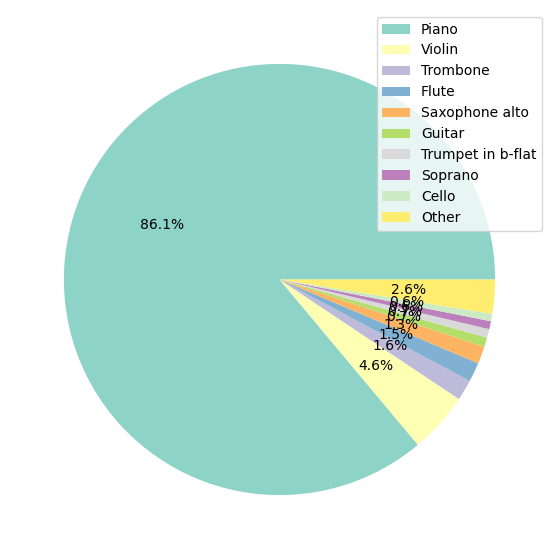

In [52]:
# Poiščemo najštevilčnejše
top_inst = instrument_frequency[instrument_frequency.frequency > 10]

# Preštejemo skupno število vseh ostalih
other_inst = instrument_frequency["frequency"][instrument_frequency.frequency <= 10].sum()

# Najštevilčnejšim inštrumentom dodamo podatek o ostalih
pie_data_inst = pd.concat([top_inst, pd.DataFrame({'instrument': ['Other'], 'frequency': [other_inst]})])

# Za namene grafa bomo kot indeks uporabili "instrument"
pie_data_inst = pie_data_inst.set_index("instrument")

# Podatki za grafični prikaz
pie_data_inst.plot.pie(y="frequency", figsize=(7, 7), ylabel="", labels=None, colormap='Set3', autopct='%1.1f%%')

#### Zasedbe

In [53]:
ensemble_frequency = music.groupby("ensemble").size().sort_values(ascending=False)
ensemble_frequency = ensemble_frequency.reset_index(name='frequency')
ensemble_frequency

,ensemble,frequency
0,Solo Piano,1554
1,Solo Violin,56
2,Piano-Voice,47
...,...,...
54,Solo Marimba,1
55,Solo Harpsichord,1
56,Woodwind Quintet,1


<Axes: >

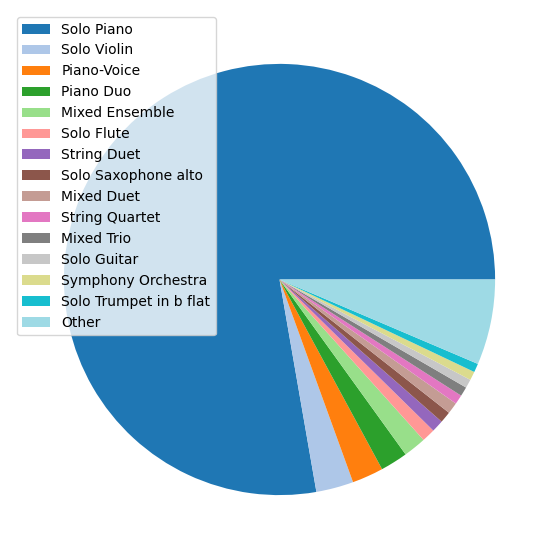

In [54]:
# Poiščemo najštevilčnejše
top_ensemble = ensemble_frequency[ensemble_frequency.frequency > 10]

# Preštejemo skupno število vseh ostalih
other_ensemble = ensemble_frequency["frequency"][ensemble_frequency.frequency <= 10].sum()

# Najštevilčnejšim žanrom dodamo podatek o ostalih
pie_data_ensemble = pd.concat([top_ensemble, pd.DataFrame({'ensemble': ['Other'], 'frequency': [other_ensemble]})])

# Za namene grafa bomo kot indeks uporabili instrument
pie_data_ensemble = pie_data_ensemble.set_index("ensemble")

# Podatki za grafični prikaz
pie_data_ensemble.plot.pie(y="frequency", figsize=(7, 7), ylabel="", labels=None, colormap='tab20')

#### Težavnostne stopnje

In [55]:
difficulty_frequency = music.groupby("difficulty").size().sort_values(ascending=False)
difficulty_frequency = difficulty_frequency.reset_index(name='frequency')
difficulty_frequency

,difficulty,frequency
0,Intermediate,743
1,Beginner,424
2,Advanced,228


#### Tonalitete

In [56]:
# Za vsak par vzporednih durov in molov preštejemo pripadajoče vnose ter jih ustrezno razvrstimo
key_frequency = music.groupby("key").size().sort_values(ascending=False)

# Popravimo indekse
key_frequency = key_frequency.reset_index(name='frequency')

key_frequency

,key,frequency
0,"C major, A minor",422
1,"G major, E minor",209
2,"B♭ major, G minor",203
...,...,...
11,"B major, G♯ minor",29
12,"G♭ major, E♭ minor",19
13,"F♯ major, D♯ minor",5


<Axes: >

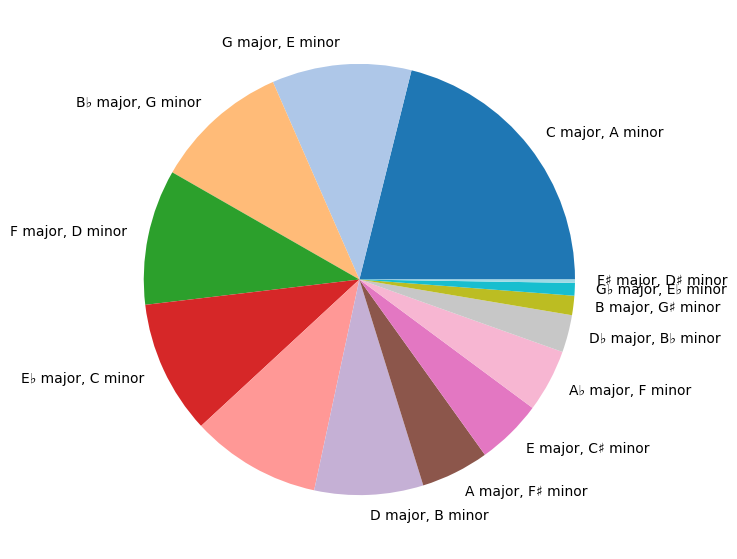

In [57]:
# Podatki za grafični prikaz
key_frequency.plot.pie(y="frequency", figsize=(7, 7), ylabel="", labels=key_frequency["key"],legend = None, colormap='tab20')

#### Avtorji originalov

In [58]:
# Združimo tabeli music in authors glede na music_id
authors_merged = music.merge(relacije_authors, on="music_id")

# Za vsakega avtorja preštejemo pripadajoče vnose ter jih ustrezno razvrstimo
author_frequency = authors_merged.groupby("original_author").size().sort_values(ascending=False)

# Popravimo indekse
author_frequency = author_frequency.reset_index(name='frequency')

author_frequency

,original_author,frequency
0,137994,63
1,26416,55
2,26453,53
...,...,...
606,142091,1
607,142022,1
608,452182,1


In [59]:
# Koliko avtorjev ima le eno pojavitev?
author_frequency[author_frequency.frequency == 1].count()

original_author    344
frequency          344
dtype: int64

Opazimo, da se veliko avtorjev ponovi le enkrat. Tudi med tistimi, kjer je ponovitev več, so razlike majhne. Zaradi številčnosti avtorjev in majhnega razpona frekvenc pojavitev bo zato najbolj informativen škatlast graf.

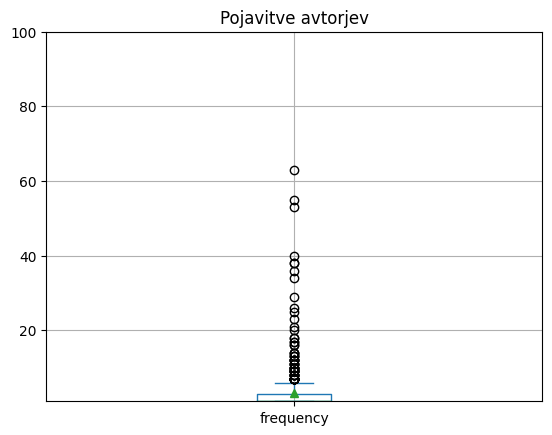

In [60]:
# Podatki za grafični prikaz
auth_plot = author_frequency.plot.box(column="frequency", grid=True, showmeans=True, ylim=(1, 100)).set_title('Pojavitve avtorjev')

In [61]:
auth_top = author_frequency.head(3)
auth_top = pd.merge(auth_top, authors, left_on="original_author", right_on="author_id", how="inner")
auth_top

,original_author,frequency,name
0,137994,63,Frédéric Chopin
1,26416,55,Johann Sebastian Bach
2,26453,53,Ludwig Van Beethoven


#### Uporabniki

Pri uporabnikih bo pristop nekoliko drugačen, saj se zdi obravnava, taka kot pri avtorjih, neinformativna. Zato si raje poglejmo, koliko različnih uporabnikov je objavilo skladbe za naslednje kategorije: inštrument, žanr, zasedbo in težavnost. Pri tem zaradi večjih razlik v zastopanosti znotraj kategorij upoštevamo razmerje, ki ga imenujemo razmerje raznolikosti [diversity_ratio]. Z drugimi besedami - zanima nas, kako raznolika je množica uporabnikov, ki so objavili dela znotraj izbranih kategorij. Cilj je predstaviti podatke v združenem škatlastem diagramu.

In [62]:
# Tabelo, ki združuje žanre in skladbe, že imamo: zanri_povezano
# Potrebujemo še povezavo skladb z uporabniki
users_genres = pd.merge(zanri_povezano, relacije_users, on="music_id")

# Uporabimo .groupby, da ustrezno razdelimo podatke.
users_genres = users_genres.groupby("genre")["user_id"].nunique()

# Popravimo indekse in poimenujemo nov stolpec
users_genres = users_genres.reset_index(name="no_of_users")

# Potrebovali bomo podatke iz tabele genre_frequency
users_genres = users_genres.merge(genre_frequency, on="genre")

# Izračunamo odstotek
users_genres["diversity_ratio"] = (users_genres["no_of_users"] / users_genres["frequency"]).round(2)

users_genres

,genre,no_of_users,frequency,diversity_ratio
0,Blues,6,6,1.00
1,Classical,545,748,0.73
2,Comedy,4,4,1.00
...,...,...,...,...
15,Rock,201,249,0.81
16,Soundtrack,393,457,0.86
17,World Music,21,25,0.84


In [63]:
# Združimo tabelo relacije_users s tabelo instruments preko music_id.
users_instruments = pd.merge(instruments, relacije_users, on="music_id")

# Na dobljeni tabeli ponovimo postopek
users_instruments = users_instruments.groupby("instrument")["user_id"].nunique()

users_instruments = users_instruments.reset_index(name="no_of_users")

users_instruments = users_instruments.merge(instrument_frequency, on="instrument")

users_instruments["diversity_ratio"] = (users_instruments["no_of_users"] / users_instruments["frequency"]).round(2)

users_instruments

,instrument,no_of_users,frequency,diversity_ratio
0,Accordion,4,5,0.80
1,Alto,1,1,1.00
2,Bass guitar,3,3,1.00
...,...,...,...,...
29,Violin,85,91,0.93
30,Vocals,1,1,1.00
31,Woodwinds (other),1,1,1.00


In [64]:
# Združimo tabelo relacije_users s tabelo music preko music_id.
users_povezano = pd.merge(music, relacije_users, on="music_id")

# Na dobljeni tabeli ponovimo postopek
users_ensemble = users_povezano.groupby("ensemble")["user_id"].nunique()

users_ensemble = users_ensemble.reset_index(name="no_of_users")

users_ensemble = users_ensemble.merge(ensemble_frequency, on="ensemble")

users_ensemble["diversity_ratio"] = (users_ensemble["no_of_users"] / users_ensemble["frequency"]).round(2)

users_ensemble

,ensemble,no_of_users,frequency,diversity_ratio
0,A Capella,2,4,0.50
1,Brass Ensemble,1,1,1.00
2,Brass Quartet,1,1,1.00
...,...,...,...,...
54,Symphony Orchestra,11,13,0.85
55,Woodwind Duet,5,5,1.00
56,Woodwind Quintet,1,1,1.00


In [65]:
users_diff = users_povezano.groupby("difficulty")["user_id"].nunique()

users_diff = users_diff.reset_index(name="no_of_users")

users_diff = users_diff.merge(difficulty_frequency, on="difficulty")

users_diff["diversity_ratio"] = (users_diff["no_of_users"] / users_diff["frequency"]).round(2)

users_diff

,difficulty,no_of_users,frequency,diversity_ratio
0,Advanced,173,228,0.76
1,Beginner,334,424,0.79
2,Intermediate,569,743,0.77


Podatke združimo v graf.

<Axes: >

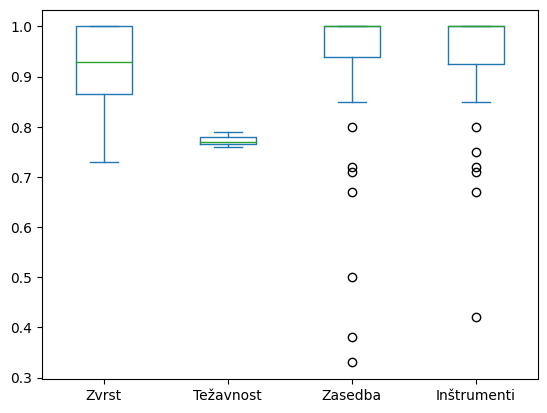

In [66]:
# Združitev zgornjih tabel
combined_diversity = pd.concat([users_genres, users_diff, users_ensemble, users_instruments], keys=['Zvrst', 'Težavnost', 'Zasedba', 'Inštrumenti'])

# Priprava podatkov za grafično ponazoritev
view = combined_diversity['diversity_ratio'].unstack(level=0)
view.plot(kind='box')

<Axes: ylabel='Density'>

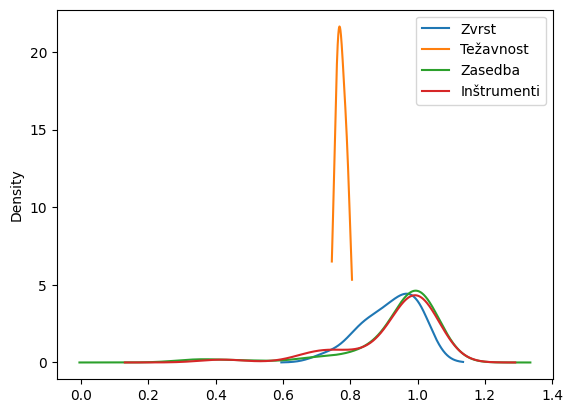

In [67]:
view.plot(kind='density')

Zgornja grafa ponazarjata, kakšna razmerja raznolikosti prevladujejo v posameznih kategorijah. Nazorno pokažeta, da sta kategoriji inštrumentov in zasedb najbolj raznoliki - večinoma imajo njuni elementi razmerje raznolikosti 1. Pri tem pa poudarjam, da je pri teh dveh kategorijah tudi veliko elementov, ki imajo le po eno skladbo, zato naše razmerje ne riše realne slike. Smiselno je podatke dodatno filtrirati, da izpustimo elemente, pri katerih so podatki lahko zavajujoči.  

V ta namen dodajam še graf, ki obravnava le elemente, ki imajo smiselno količino podatkov.

<Axes: >

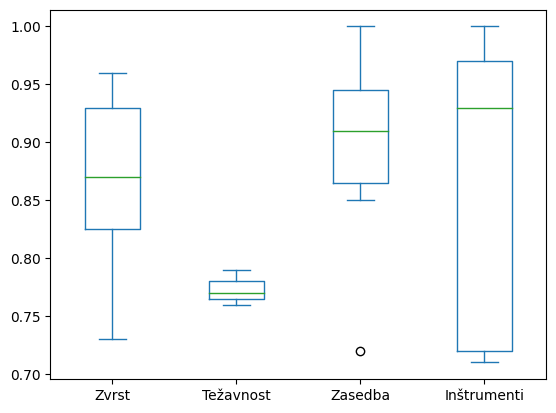

In [68]:
# Uveljavitev filtrov
# Med žanri izberemo tiste, ki jim pripada vsaj 1% skladb
users_genres_top = users_genres[users_genres.frequency >= 20]
# Med glasbili izberemo tista, ki jim pripada vsaj 1% skladb
users_instruments_top = users_instruments[users_instruments.frequency >= 20]
# Težavnosti imajo smiselno razporeditev brez filtriranja
users_diff_top = users_diff
# Med zasedbami izberemo tiste, ki jim pripada vsaj 0,9% skladb
users_ensemble_top = users_ensemble[users_ensemble.frequency >= 18]

# Združitev tabel
combined_diversity = pd.concat([users_genres_top, users_diff_top, users_ensemble_top, users_instruments_top], keys=['Zvrst', 'Težavnost', 'Zasedba', 'Inštrumenti'])


# Priprava podatkov za grafično ponazoritev
view_top = combined_diversity['diversity_ratio'].unstack(level=0)
view_top.plot(kind='box')


S tem smo prišli do grafov, na podlagi katerih si upamo sklepati več, saj vključujejo bolj smiselne dele podatkov.  
* Opazimo lahko, da je težavnost zelo homogena kategorija - raznolikost je pri vseh stopnjah težavnosti zelo podobna. Ker je kategorija majhna (težavnostne stopnje so le tri!), in ker se posamezni elementi ne drastično razlikujejo v količini pripadajočih skladb, nam ta del grafa da zanesljivo sliko o razmerju raznolikosti.
* Nimamo več izrazitih vrhov pri 1.0, kar nam pove, da smo s filtriranjem podatkov prišli do boljših informacij.
* V kategoriji inštrumentov najdemo največje razlike med raznolikostjo znotraj njenih elementov (tj, inptrumentov). Pri tem je vrh med 0.8 in 1.0 manj opazen kot prej, kar nam pove, da je precej inštrumentov takih, ki jim je namenjeno manjše število skladb. 
* Tako zvrsti kot kategorije imajo veliko stopnjo raznolikosti.

### Popularnost

#### Opredelitev merila

Naslednji problem, ki se ga lotimo, je obravnava popularnosti skladb. Najprej si poglejmo ocene.

In [69]:
min(music.rating)

4.51

Vidimo, da ocen manjših od 4.51 ni, torej te ne bodo zares informativne. Zato nas bo za oceno popularnosti skladbe bolj zanimalo razmerje med ljudmi, ki so jo videli, in ljudmi, ki so jo dodali med najljubše. Poimenujmo ga indeks popularnosti ["popularity_index"] in ga dodajmo v našo tabelo. Hkrati lahko odstranimo stolpca "votes" in "stars", saj nam ne zares koristita.

Razmerje bomo izračunali preko formule $$ \text{popularity index} = \frac{\text{favorites}}{\text{views}}$$

In [70]:
music["popularity_index"] = ((music["favorites"] / music["views"])).round(4)
music.sort_values(by="popularity_index", ascending=False)

,title,rating,votes,ensemble,all_instruments,key,date,duration,public_domain,favorites,difficulty,pages,views,parts,link,duration_seconds,popularity_index
music_id,,,,,,,,,,,,,,,,,
8775498,Golden hour,4.84,1168,Solo Piano,[Piano],"E major, C♯ minor","Oct 08, 2022",01:30,NE,6731,Intermediate,4,53069,1,https://musescore.com/user/84433/scores/8775498,90.0,0.1268
5273840,"Coldplay ""Clocks""",4.73,964,Solo Piano,[Piano],"A♭ major, F minor","Oct 17, 2018",04:00,NE,4669,Beginner,3,37082,1,https://musescore.com/user/28698337/scores/527...,240.0,0.1259
7307108,Always remember us this way – Lady Gaga Always...,4.75,445,Solo Piano,[Piano],"C major, A minor","Dec 23, 2021",03:08,NE,1516,Intermediate,5,13319,1,https://musescore.com/user/38574629/scores/730...,188.0,0.1138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8988956,Idea 10 – Gibran Alcocer,4.80,343,Solo Piano,[Piano],"B♭ major, G minor","Nov 14, 2022",02:10,DA,435,Beginner,4,60684,1,https://musescore.com/user/37453194/scores/898...,130.0,0.0072
5077553,Va pensiero,4.81,354,SATB,[Piano],"F♯ major, D♯ minor","May 01, 2018",04:13,DA,173,NaN,9,24527,5,https://musescore.com/user/1964776/scores/5077553,253.0,0.0071
6259956,Para Elisa - Original - Beethoven,4.79,554,Solo Piano,[Piano],"C major, A minor","Jul 21, 2020",03:32,DA,592,Intermediate,3,121894,1,https://musescore.com/user/35600168/scores/625...,212.0,0.0049


In [71]:
music_new = music.drop(columns=["votes", "rating"])
music_new = music_new.sort_values(by="popularity_index", ascending=False)
music_new

,title,ensemble,all_instruments,key,date,duration,public_domain,favorites,difficulty,pages,views,parts,link,duration_seconds,popularity_index
music_id,,,,,,,,,,,,,,,
8775498,Golden hour,Solo Piano,[Piano],"E major, C♯ minor","Oct 08, 2022",01:30,NE,6731,Intermediate,4,53069,1,https://musescore.com/user/84433/scores/8775498,90.0,0.1268
5273840,"Coldplay ""Clocks""",Solo Piano,[Piano],"A♭ major, F minor","Oct 17, 2018",04:00,NE,4669,Beginner,3,37082,1,https://musescore.com/user/28698337/scores/527...,240.0,0.1259
7307108,Always remember us this way – Lady Gaga Always...,Solo Piano,[Piano],"C major, A minor","Dec 23, 2021",03:08,NE,1516,Intermediate,5,13319,1,https://musescore.com/user/38574629/scores/730...,188.0,0.1138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8988956,Idea 10 – Gibran Alcocer,Solo Piano,[Piano],"B♭ major, G minor","Nov 14, 2022",02:10,DA,435,Beginner,4,60684,1,https://musescore.com/user/37453194/scores/898...,130.0,0.0072
5077553,Va pensiero,SATB,[Piano],"F♯ major, D♯ minor","May 01, 2018",04:13,DA,173,NaN,9,24527,5,https://musescore.com/user/1964776/scores/5077553,253.0,0.0071
6259956,Para Elisa - Original - Beethoven,Solo Piano,[Piano],"C major, A minor","Jul 21, 2020",03:32,DA,592,Intermediate,3,121894,1,https://musescore.com/user/35600168/scores/625...,212.0,0.0049


#### Popularnost kategorij

Ko smo ugotovili splošno urejenost po popularnosti nas zanima popularnost originalov. S pomočjo tabele relacije_author uredimo originalne naslove po njihovi popularnosti glede na zgornjo tabelo. 
Natančneje, tudi za originale izračunamo popularnostni indeks. Tega izračunamo kot razmerje med vsoto vseh "favorite" oznak in vsotov vseh ogledov skladb v dani kategoriji.

In [72]:
authors_merged = relacije_authors.merge(music_new, on= "music_id")

# Preštejemo skupne "views" in "favorites" 
popularity_originals = authors_merged.groupby(["original_author", "original_title"]).agg({"views": "sum", "favorites": "sum"}).reset_index()

# Izračun popularnosti
popularity_originals["popularity_index_originals"] = popularity_originals["favorites"] / popularity_originals["views"]

# Urejanje po popularnosti
popularity_originals = popularity_originals.sort_values(by="popularity_index_originals", ascending=False)

popularity_originals



,original_author,original_title,views,favorites,popularity_index_originals
1065,227288,Fairly Oddparents Theme Song,8394,857,0.102097
499,135375,Victor's Piano Solo,28060,2467,0.087919
517,135732,Don't Let The Sun Go Down On Me,8690,735,0.084580
...,...,...,...,...,...
952,194011,"Zigeunerweisen, Op.20",278077,2089,0.007512
199,31365,Nabucco,24527,173,0.007053
885,170457,Para Elisa,121894,592,0.004857


Pripravimo si podatke za drugi del naloge. Potrebujemo izračun popularnosti za vsako kategorijo posebej. Pri tem bo popularnost pravzaprav simetrična pojmu verjetnosti - kako verjetno je, da bo skladba z določenim parametrom popularna.

In [73]:
# Popularnost žanrov
genre_merged = genres.merge(music_new, on= "music_id")

popularity_genres = genre_merged.groupby("genre").agg({"views": "sum", "favorites": "sum"}).reset_index()

# Izračun popularnosti
popularity_genres["popularity_index_genre"] = popularity_genres["favorites"] / popularity_genres["views"]

# Urejanje po popularnosti
popularity_genres = popularity_genres.sort_values(by="popularity_index_genre", ascending=False)

popularity_genres


,genre,views,favorites,popularity_index_genre
0,Blues,227102,9243,0.040700
13,"R&b, Funk & Soul",10830718,400527,0.036981
3,Country,699010,25683,0.036742
...,...,...,...,...
10,Metal,1335156,37870,0.028364
2,Comedy,426482,8921,0.020918
6,Experimental,739072,13072,0.017687


In [74]:
# Popularnost glasbil
instruments_merged = instruments.merge(music_new, on= "music_id")

popularity_instruments = instruments_merged.groupby("instrument").agg({"views": "sum", "favorites": "sum"}).reset_index()

# Izračun popularnosti
popularity_instruments["popularity_index_instruments"] = popularity_instruments["favorites"] / popularity_instruments["views"]

# Urejanje po popularnosti
popularity_instruments = popularity_instruments.sort_values(by="popularity_index_instruments", ascending=False)

popularity_instruments

,instrument,views,favorites,popularity_index_instruments
25,Trombone tenor,45478,2105,0.046286
10,Flute,2749860,112707,0.040986
17,Saxophone alto,2238887,77993,0.034836
...,...,...,...,...
1,Alto,225771,3078,0.013633
9,Flugelhorn,28150,347,0.012327
19,Snare drum,118685,1283,0.010810


In [75]:
# Popularnost težavnosti
# Preštejemo skupne "views" in "favorites" ter podatke združimo v skupine
popularity_diff = music_new.groupby("difficulty").agg({"views": "sum", "favorites": "sum"}).reset_index()

# Izračun popularnosti
popularity_diff["popularity_index_diff"] = popularity_diff["favorites"] / popularity_diff["views"]

# Urejanje po popularnosti
popularity_diff = popularity_diff.sort_values(by="popularity_index_diff", ascending=False)

popularity_diff

,difficulty,views,favorites,popularity_index_diff
1,Beginner,56353339,2031202,0.036044
2,Intermediate,122236829,4191825,0.034293
0,Advanced,35776460,1119864,0.031302


In [76]:
# Popularnost zasedb
# Preštejemo skupne "views" in "favorites" 
popularity_ensemble = music_new.groupby(["ensemble"]).agg({"views": "sum", "favorites": "sum"}).reset_index()

# Izračun popularnosti
popularity_ensemble["popularity_index_ensemble"] = popularity_ensemble["favorites"] / popularity_ensemble["views"]

# Urejanje po popularnosti
popularity_ensemble = popularity_ensemble.sort_values(by="popularity_index_ensemble", ascending=False)

popularity_ensemble

,ensemble,views,favorites,popularity_index_ensemble
19,Piano Four Hand,714650,34512,0.048292
3,Brass Quintet,129052,5987,0.046392
43,Solo Trombone tenor,45478,2105,0.046286
...,...,...,...,...
32,Solo Flugelhorn,28150,347,0.012327
23,SATB,64528,734,0.011375
17,Percussion Quartet,118685,1283,0.010810


In [77]:
# Popularnost tonalitet
# Preštejemo skupne "views" in "favorites" 
popularity_keys = music_new.groupby(["key"]).agg({"views": "sum", "favorites": "sum"}).reset_index()

# Izračun popularnosti
popularity_keys["popularity_index_key"] = popularity_keys["favorites"] / popularity_keys["views"]

# Urejanje po popularnosti
popularity_keys = popularity_keys.sort_values(by="popularity_index_key", ascending=False)

popularity_keys

,key,views,favorites,popularity_index_key
7,"D♭ major, B♭ minor",12023129,423050,0.035186
10,"F major, D minor",29060520,1016524,0.034980
2,"A♭ major, F minor",14850327,513779,0.034597
...,...,...,...,...
0,,21942407,647499,0.029509
13,"G♭ major, E♭ minor",1222322,36016,0.029465
3,"B major, G♯ minor",4026540,102078,0.025351


Zanima nas še, priredbe katerih avtorjev so najpopularnejše.

In [78]:
# Preštejemo skupne "views" in "favorites" 
popularity_authors = authors_merged.groupby(["original_author"]).agg({"views": "sum", "favorites": "sum"}).reset_index()

# Izračun popularnosti
popularity_authors["popularity_index_authors"] = popularity_authors["favorites"] / popularity_authors["views"]

# Urejanje po popularnosti
popularity_authors = popularity_authors.sort_values(by="popularity_index_authors", ascending=False)

# Želimo še imena avtorjev
popularity_authors = popularity_authors.merge(authors, left_on="original_author", right_on="author_id")

popularity_authors


,original_author,views,favorites,popularity_index_authors,name
0,227288,8394,857,0.102097,Ron Jones And Butch Hartman
1,130573,11491,916,0.079715,Seal
2,137056,69538,5517,0.079338,Amy Winehouse
...,...,...,...,...,...
604,262068,103268,945,0.009151,Tetsurō Oda
605,170457,171893,1375,0.007999,Música Clásica
606,194011,278077,2089,0.007512,Pablo De Sarasate


#### Popularnost in količina

V prejšnjih dveh poglavjih sem se s popularnostjo in količinsko sliko podatkov ukvarjala ločeno. Zaradi narave podatkov pa se pojavi vprašanje, kako sta ta dva parametra povezana. So tisti, ki jih je več, tudi bolj priljubljeni?

,genre,views,favorites,popularity_index_genre,frequency
0,Blues,227102,9243,0.040700,6
1,"R&b, Funk & Soul",10830718,400527,0.036981,67
2,Country,699010,25683,0.036742,11
...,...,...,...,...,...
15,Metal,1335156,37870,0.028364,9
16,Comedy,426482,8921,0.020918,4
17,Experimental,739072,13072,0.017687,3


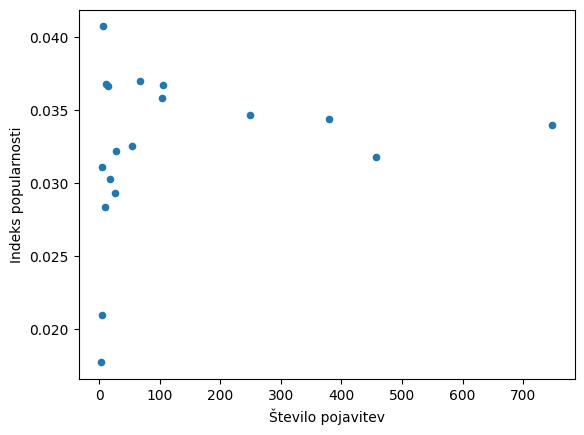

In [92]:
compare_genres = popularity_genres.merge(genre_frequency, on="genre")
compare_genres = compare_genres.sort_values(by="popularity_index_genre", ascending = False)
compare_genres = compare_genres

compare_genres.plot.scatter(x = "frequency", y = "popularity_index_genre", xlabel= "Število pojavitev", ylabel = "Indeks popularnosti")

compare_genres

,instrument,views,favorites,popularity_index_instruments,frequency
0,Trombone tenor,45478,2105,0.046286,1
1,Flute,2749860,112707,0.040986,29
2,Saxophone alto,2238887,77993,0.034836,26
...,...,...,...,...,...
29,Alto,225771,3078,0.013633,1
30,Flugelhorn,28150,347,0.012327,1
31,Snare drum,118685,1283,0.010810,1


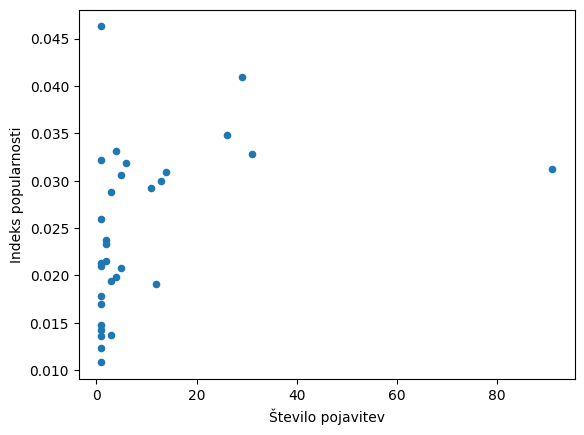

In [93]:
compare_instruments = popularity_instruments.merge(instrument_frequency, on="instrument")
compare_instruments = compare_instruments[compare_instruments.frequency < 1000] # Izločimo klavir, saj je to roben primer
compare_instruments = compare_instruments.sort_values(by="popularity_index_instruments", ascending = False)
compare_instruments = compare_instruments

compare_instruments.plot.scatter(x = "frequency", y = "popularity_index_instruments", xlabel= "Število pojavitev", ylabel = "Indeks popularnosti")

compare_instruments

,difficulty,views,favorites,popularity_index_diff,frequency
0,Beginner,56353339,2031202,0.036044,424
1,Intermediate,122236829,4191825,0.034293,743
2,Advanced,35776460,1119864,0.031302,228


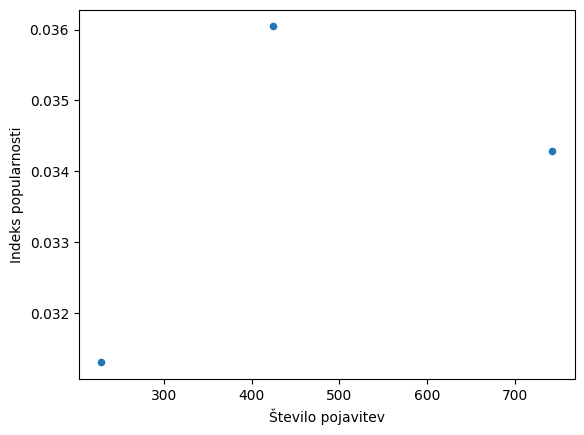

In [88]:
compare_diff = popularity_diff.merge(difficulty_frequency, on="difficulty")
compare_diff = compare_diff.sort_values(by="popularity_index_diff", ascending = False)
compare_diff = compare_diff

compare_diff.plot.scatter(x = "frequency", y = "popularity_index_diff", xlabel= "Število pojavitev", ylabel = "Indeks popularnosti")

compare_diff

,ensemble,views,favorites,popularity_index_ensemble,frequency
0,Piano Four Hand,714650,34512,0.048292,6
1,Brass Quintet,129052,5987,0.046392,6
2,Solo Trombone tenor,45478,2105,0.046286,1
...,...,...,...,...,...
54,Solo Flugelhorn,28150,347,0.012327,1
55,SATB,64528,734,0.011375,2
56,Percussion Quartet,118685,1283,0.010810,1


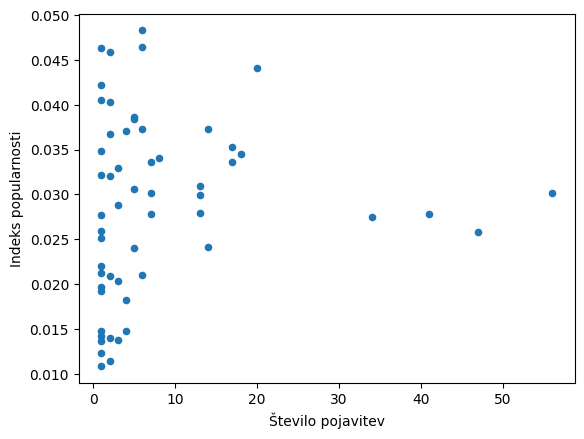

In [94]:
compare_ensemble = popularity_ensemble.merge(ensemble_frequency, on="ensemble")
compare_ensemble = compare_ensemble[compare_ensemble.frequency < 1000] # Izločimo Solo klavir, saj je to roben primer
compare_ensemble = compare_ensemble.sort_values(by="popularity_index_ensemble", ascending = False)
compare_ensemble = compare_ensemble

compare_ensemble.plot.scatter(x = "frequency", y = "popularity_index_ensemble", xlabel= "Število pojavitev", ylabel = "Indeks popularnosti")

compare_ensemble

,key,views,favorites,popularity_index_key,frequency
0,"D♭ major, B♭ minor",12023129,423050,0.035186,56
1,"F major, D minor",29060520,1016524,0.034980,203
2,"A♭ major, F minor",14850327,513779,0.034597,94
...,...,...,...,...,...
11,,21942407,647499,0.029509,195
12,"G♭ major, E♭ minor",1222322,36016,0.029465,19
13,"B major, G♯ minor",4026540,102078,0.025351,29


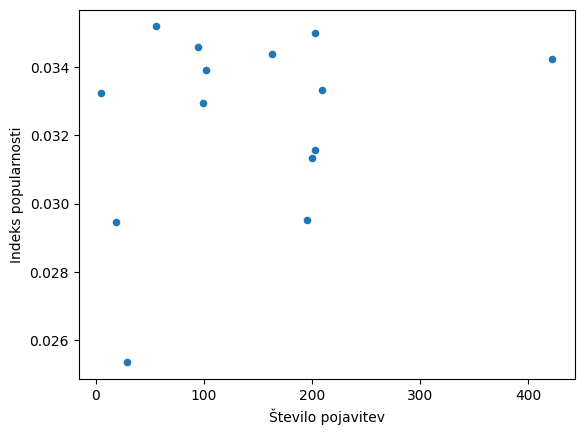

In [131]:
compare_keys = popularity_keys.merge(key_frequency, on="key")
compare_keys = compare_keys.sort_values(by="popularity_index_key", ascending = False)
compare_keys = compare_keys

compare_keys.plot.scatter(x = "frequency", y = "popularity_index_key", xlabel= "Število pojavitev", ylabel = "Indeks popularnosti")

compare_keys

,original_author,views,favorites,popularity_index_authors,name,frequency
0,227288,8394,857,0.102097,Ron Jones And Butch Hartman,1
1,130573,11491,916,0.079715,Seal,1
2,137056,69538,5517,0.079338,Amy Winehouse,2
...,...,...,...,...,...,...
604,262068,103268,945,0.009151,Tetsurō Oda,1
605,170457,171893,1375,0.007999,Música Clásica,2
606,194011,278077,2089,0.007512,Pablo De Sarasate,1


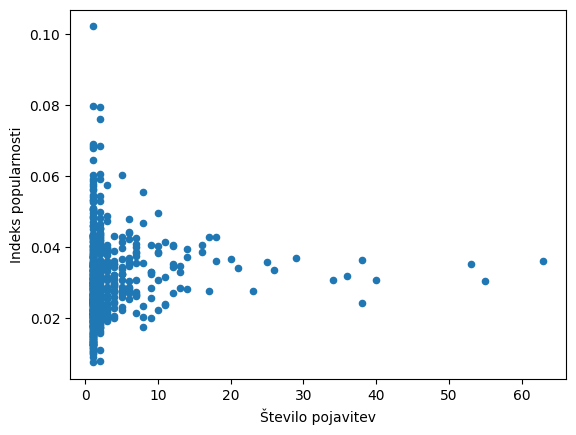

In [87]:
compare_authors = popularity_authors.merge(author_frequency, on="original_author")
compare_authors = compare_authors.sort_values(by="popularity_index_authors", ascending = False)
compare_authors = compare_authors

compare_authors.plot.scatter(x = "frequency", y = "popularity_index_authors", xlabel= "Število pojavitev", ylabel = "Indeks popularnosti")

compare_authors

### Klasična glasba

Klasična glasba velja za osnovo in hkrati sam vrh glasbenega ustvarjanja. V glasbenih šolah je največji poudarek na učenju klasičnih del, s katerimi glasbeniki pridobijo osnovno znanje in tehniko, ki jim pomaga pri izvajanju ostalih del. Skozi klasična dela razumemo, kako se glasba spreminja skozi leta, je katalog razvoja tehnik, inštrumentov in glasbenih okusov. V tej kategoriji najdemo najosnovnejše vaje in tudi najveličastnejša dela, ki nosijo velik zgodovinski pomen. Kategoriji, ki vključuje tako širok spekter del, bom zato posvetila posebno pozornost.

Za začetek me zanima, kako se klasična dela primerjajo z ostalimi. Pri tem bom pozorna na dejstvo, da se pri posameznih skladbah lahko pojavi več žanrov hkrati, zato bom skladbe najprej razdelila na tiste, ki spadajo med klasike in tiste, ki ne.

In [95]:
# tabela klasičnih skladb
classics = zanri_povezano[zanri_povezano.genre == "Classical"]

# indeksi klasik
classics_id = classics[["music_id"]]

# tabela skladb, ki ne spadajo med klasike
not_classics = pd.merge(music, classics_id, on="music_id", how="left", indicator=True)
not_classics = not_classics[not_classics._merge == "left_only"]

Sedaj lahko tabeli primerjamo. Odgovoriti želimo na naslednja vprašanja:
* So klasike daljše od ostalih? So težje? Trajajo dlje? So kompleksnejše - imajo več delov? 
* Kakšna je raznolikost tonalitet pri klasikah, in v primerjavi z neklasičnimi deli?
* Imajo klasike večjo raznolikost v inštrumentih?

In [96]:
# Najpogostejša težavnost
classics_diff = classics.groupby("difficulty").size()
classics_diff = classics_diff.reset_index(name='count')
classics_diff.set_index('difficulty', inplace=True)


not_classics_diff = not_classics.groupby("difficulty").size()
not_classics_diff = not_classics_diff.reset_index(name='count')
not_classics_diff.set_index('difficulty', inplace=True)

# Primerjava težavnosti
how_hard = pd.DataFrame({
    "type" : ["Klasike", "Ostale"],
    "Beginner" : [classics_diff.at["Beginner", "count"], not_classics_diff.at["Beginner", "count"]], 
    "Intermediate" : [classics_diff.at["Intermediate", "count"], not_classics_diff.at["Intermediate", "count"]],
    "Advanced" : [classics_diff.at["Advanced", "count"], not_classics_diff.at["Advanced", "count"]]
})

how_hard.set_index("type", inplace=True)
how_hard

,Beginner,Intermediate,Advanced
type,,,
Klasike,128,245,123
Ostale,296,498,105


<Axes: >

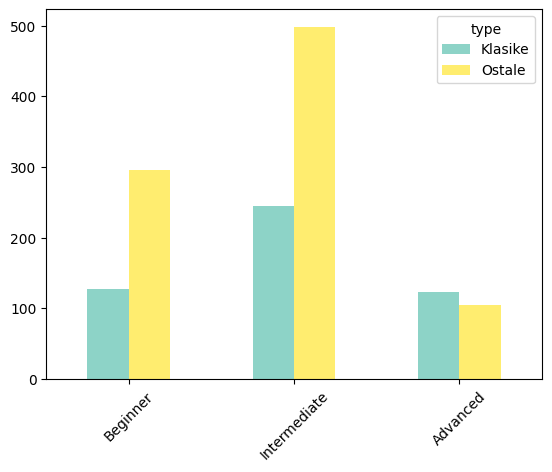

In [97]:
transposed = how_hard.transpose()
transposed.plot.bar(rot = 45, colormap = "Set3")

In [98]:
# Primerjava ostalih parametrov
comparsion =  pd.DataFrame({
    "type" : ["Klasike", "Ostale"],
    "pages" : [classics.pages.mean().round(2), not_classics.pages.mean().round(2)], 
    "parts" : [classics.parts.mean().round(2), not_classics.parts.mean().round(2)],
    "duration_seconds" : [classics.duration_seconds.mean().round(2), not_classics.duration_seconds.mean().round(2)],
})

comparsion

,type,pages,parts,duration_seconds
0,Klasike,7.01,1.88,256.89
1,Ostale,5.57,1.77,190.94


Raznolikost inštrumentov

In [112]:
# Združimo s tabelo o inštrumentih
classics_instruments = classics.merge(instruments, on="music_id")
nc_instruments = not_classics.merge(instruments, on="music_id")

c_grouped = classics_instruments.groupby("instrument")
klasike = pd.DataFrame({
    "instrument": list(c_grouped.groups.keys()),
    "count_classics": c_grouped.size().values
})

nc_grouped = nc_instruments.groupby("instrument")
ostale = pd.DataFrame({
    "instrument": list(nc_grouped.groups.keys()),
    "count_others": nc_grouped.size().values
})

klasike = klasike.sort_values(by="count_classics", ascending=False)
ostale = ostale.sort_values(by="count_others", ascending=False)

# "outer" način poskrbi, da v tabeli ostanejo tudi inštrumenti, ki jih ni v obeh tabelah
merged_summary = klasike.merge(ostale, on="instrument", how="outer")

merged_summary["count_classics"] = merged_summary["count_classics"].fillna(0).astype(int)
merged_summary["count_others"] = merged_summary["count_others"].fillna(0).astype(int)

merged_summary

,instrument,count_classics,count_others
0,Piano,626,1095
1,Violin,55,36
2,Flute,13,16
...,...,...,...
29,Contrabass,0,1
30,Bassoon,0,1
31,Vocals,0,1


In [111]:
len(klasike), len(ostale)

(22, 26)

Raznolikost tonalitet

In [122]:
# Pridobimo informacije o tonalitetah
classics_keys = classics[["key"]]
nc_keys = not_classics[["key"]]

c_keys = classics_keys.groupby("key")
klasike_keys = pd.DataFrame({
    "key": list(c_keys.groups.keys()),
    "count_classics": c_keys.size().values
})

nc_keys_grouped = nc_keys.groupby("key")
ostale_keys = pd.DataFrame({
    "key": list(nc_keys_grouped.groups.keys()),
    "count_others": nc_keys_grouped.size().values
})

klasike_keys = klasike_keys.sort_values(by="count_classics", ascending=False)
ostale_keys = ostale_keys.sort_values(by="count_others", ascending=False)

# "outer" način poskrbi, da v tabeli ostanejo tudi inštrumenti, ki jih ni v obeh tabelah
merged_summary_keys = klasike_keys.merge(ostale_keys, on="key", how="outer")

merged_summary_keys["count_classics"] = merged_summary_keys["count_classics"].fillna(0).astype(int)
merged_summary_keys["count_others"] = merged_summary_keys["count_others"].fillna(0).astype(int)

merged_summary_keys



,key,count_classics,count_others
0,"C major, A minor",172,250
1,"B♭ major, G minor",108,95
2,"D major, B minor",91,72
...,...,...,...
11,"B major, G♯ minor",5,24
12,"F♯ major, D♯ minor",3,2
13,,0,195


<Axes: xlabel='key'>

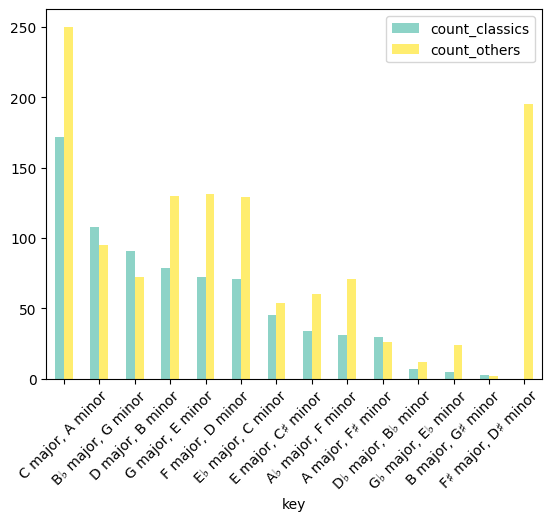

In [130]:
merged_summary_keys.plot.bar(x="key", rot = 45, colormap = "Set3")

### Zaključek

Rezultati količinske analize:
* Največ je klasične glasbe, sledijo ji filmska, pop in rock glasba.
* Največ skladb je napisanih za klavir. Te predstavljajo kar 86.1% vseh skladb. Sledijo jim skladbe za violino.
* Največ skladb je namenjenih solo klavirju.
* Največ je skladb za vmesni nivo težavnosti.
* Največkrat so skladbe napisane v C-duru ali a-molu
* Več kot polovica originalnih avtorjev ima v zbirki podatkov le eno skladbo. Največ je priredb del Frédérica Chopina, Johanna Sebastiana Bacha in Ludwiga Van Beethovna.

Popularnost:
* Najpopularnejši žanri so Blues; R/b, funk and soul; in Country
* Najpopularnejši instrumenti so Tenor trobenta, Flavta in Alt saksofon
* Najpopularnejše so skladbe za začetnike
* Najpopularnejše zasedbe so Štiriročni klavir, Kvintet trobil, Solo tenor trobenta
* Najpopularnejši pari vzporednih durov in molov so Des-dur in b-mol; F-dur in d-mol; As-dur in f-mol
* Avtorji, katerih skladbe imajo najpopularnejše priredbe, so Ron Jones And Butch Hartman; Seal in Amy Winehouse

Popularnost in količina:
* **Več, kot je skladb, višja je popularnost, vendar maksimalna popularnost ni dosežena pri najpogostejših kategorijah**: to velja za žanre, inštrumente in tonalitete
* **Več, kot je skladb, bolj popularnost teži k vmesnim vrednostim**: to velja za avtorje in zasedbe
* **Težavnost**: Najpopularnejpe so skladbe za začetnike, ki pa jih ni največ. Najvel je skladb za vmesni nivo težavnosti. Najmanj je skladb za izkušene glasbenike, te so tudi najmanj popularne.

Klasična glasba:
* Največ skladb najvišje zahtevnosti najdemo med klasikami. Za začetnike in srednjo zahtevnost jih je več med ostalimi.
* Klasične skladbe imajo več strani, trajajo dlje in imajo več delov. Razlike so majhne.
* Več inštrumentov je zastopanih v skladbah, ki ne spadajo med klasike.
* Med tistimi, ki niso klasike, je zastopanih tudi več tonalitet. 



Preverjanje hipotez:
* **Največ skladb je klasične zvrsti, in napisanih za klavir in kitaro**: Res je največ skladb klasičnih in napisanih za klavir, vendar kitara ni med najpopularnejšimi. *Hipoteza je delno pravilna.*
* **Največ skladb je napisanih v C-duru in a-molu, večje zastopanosti ostalih tonalitet bodo med klasičnimi**: Res je najpogostejši par vzporednega dura in mola C-dur in a-mol. V nasprotju s hipotezo pa je več tonalitet zastopanih med skladbami, ki niso klasične.  *Hipoteza je delno pravilna.*
* **Klasične skladbe bodo imele največjo kompleksnost, torej bodo najdaljše in z največ deli**: Res, klasične skladbe imajo več delov, trajajo dlje in imajo več strani. Razlike ped parametri pa niso velike. *Hipoteza je pravilna*